# Bank Marketing Campaign

<b>Overview and Motivation:</b> The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit, variable y.

<b>Goal:</b> Goal is to identify the features/variables for a successful term deposit, which would save human effort and other resources involved in a direct marketing campaign.

<b>Approach:</b> - Classify customers capable of subscribing to the term deposit and optimize the target list of consumers of a campaign. Understand the factors that impact customer decisions.

<b>Data Source:</b>
UCI Machine Learning Repository to get the data.  https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import requests, zipfile, StringIO
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import sklearn.svm
import csv

In [2]:
data=pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


# Exploratory Data Analysis

In [3]:
# Exploring categorical data
col = data.columns.values
col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
 'month', 'day_of_week','poutcome', 'y']

for id,val in enumerate(col,1):
    col_value = pd.unique(data[val].ravel())
    print "\n {}. Unique values for {} are \n {} \n Unique value total = {} ".format(id,val,col_value[:10],len(col_value))


 1. Unique values for job are 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown'] 
 Unique value total = 12 

 2. Unique values for marital are 
 ['married' 'single' 'divorced' 'unknown'] 
 Unique value total = 4 

 3. Unique values for education are 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 
 Unique value total = 8 

 4. Unique values for default are 
 ['no' 'unknown' 'yes'] 
 Unique value total = 3 

 5. Unique values for housing are 
 ['no' 'yes' 'unknown'] 
 Unique value total = 3 

 6. Unique values for loan are 
 ['no' 'yes' 'unknown'] 
 Unique value total = 3 

 7. Unique values for contact are 
 ['telephone' 'cellular'] 
 Unique value total = 2 

 8. Unique values for month are 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 
 Unique value total = 10 

 9. Unique values for day_of_week are 
 ['mon' 'tue' 'wed' 'thu

In [4]:

data.groupby('y')#.mean() #pdays has negative impact, 49% of people have been contacted previously among 'yes'

In [5]:
len(data[data.y=='yes'])*1.0/(len(data)) #11% have term deposit

0.11265417111780131

In [6]:
data[data.y=='yes'].corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.059319,-0.007920,-0.064991,0.074937,-0.081579,-0.024695,0.141166,-0.085403,-0.111972
duration,-0.059319,1.000000,0.156859,0.237858,-0.231527,0.503056,0.237558,-0.143827,0.499710,0.481981
campaign,-0.007920,0.156859,1.000000,0.106762,-0.104093,0.221760,0.116511,-0.042858,0.211863,0.202677
pdays,-0.064991,0.237858,0.106762,1.000000,-0.728953,0.280671,-0.055063,-0.169883,0.364535,0.453334
previous,0.074937,-0.231527,-0.104093,-0.728953,1.000000,-0.284754,0.091215,0.127833,-0.391993,-0.488325
emp.var.rate,-0.081579,0.503056,0.221760,0.280671,-0.284754,1.000000,0.660341,-0.267241,0.926117,0.787633
cons.price.idx,-0.024695,0.237558,0.116511,-0.055063,0.091215,0.660341,1.000000,-0.328344,0.414585,0.119655
cons.conf.idx,0.141166,-0.143827,-0.042858,-0.169883,0.127833,-0.267241,-0.328344,1.000000,-0.120171,-0.203270
euribor3m,-0.085403,0.499710,0.211863,0.364535,-0.391993,0.926117,0.414585,-0.120171,1.000000,0.922214
nr.employed,-0.111972,0.481981,0.202677,0.453334,-0.488325,0.787633,0.119655,-0.203270,0.922214,1.000000


C:\Users\mahesh\Anaconda2\lib\site-packages\seaborn\categorical.py:3304: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


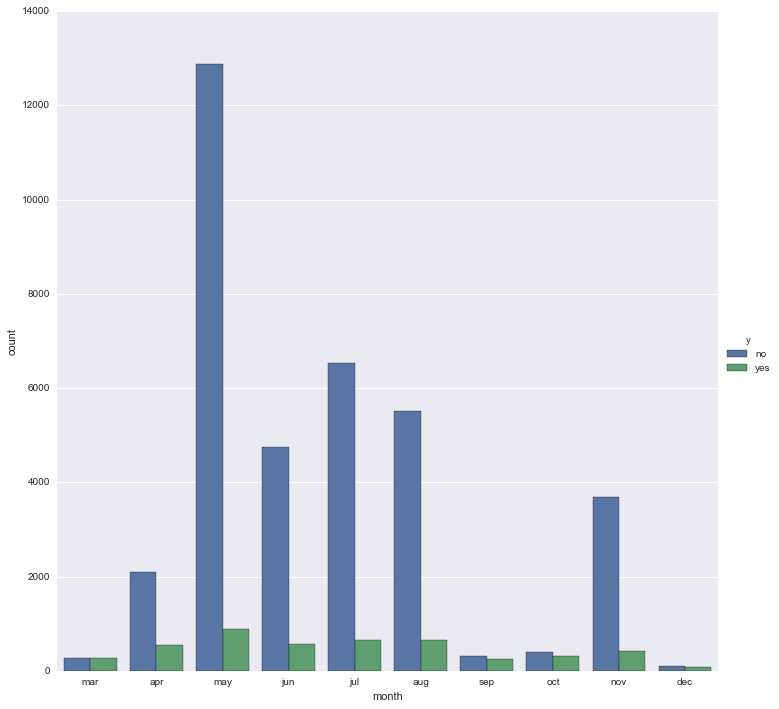

In [7]:
#histogram by month
mon = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
sns.factorplot("month",hue="y", data=data, kind="count",x_order=mon,size=10)


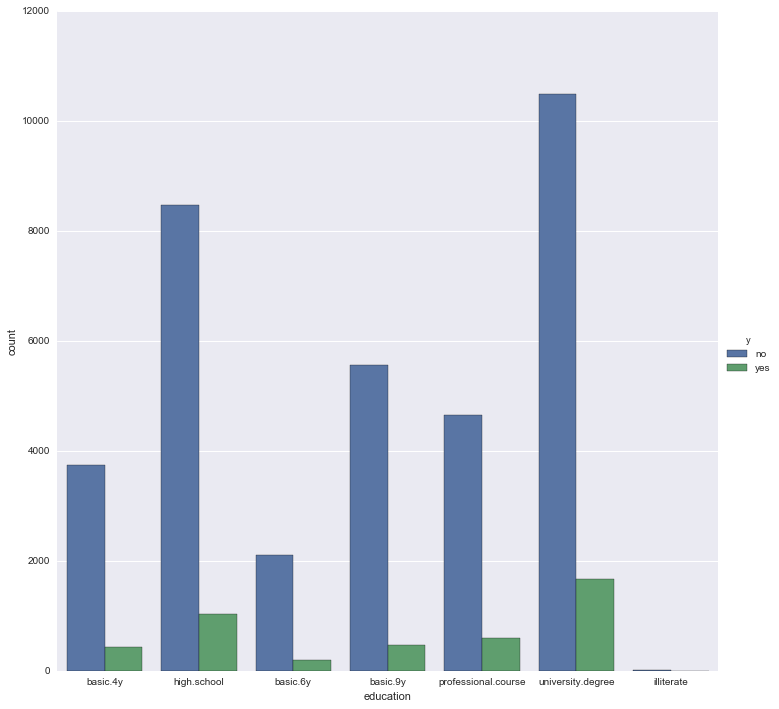

In [8]:
#histogram by education
g = sns.factorplot("education", hue="y", data=data[data['education']!='unknown'], kind='count', size=10)


AttributeError: 'tuple' object has no attribute 'show'

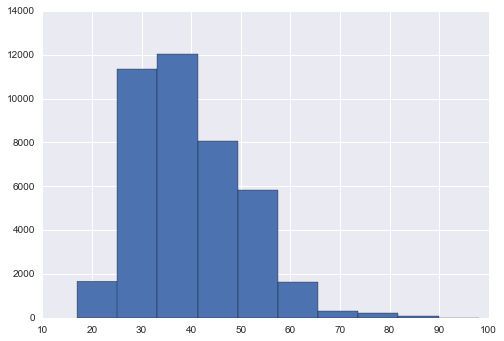

In [9]:
#histogram by age
plt.hist(data['age']).show()


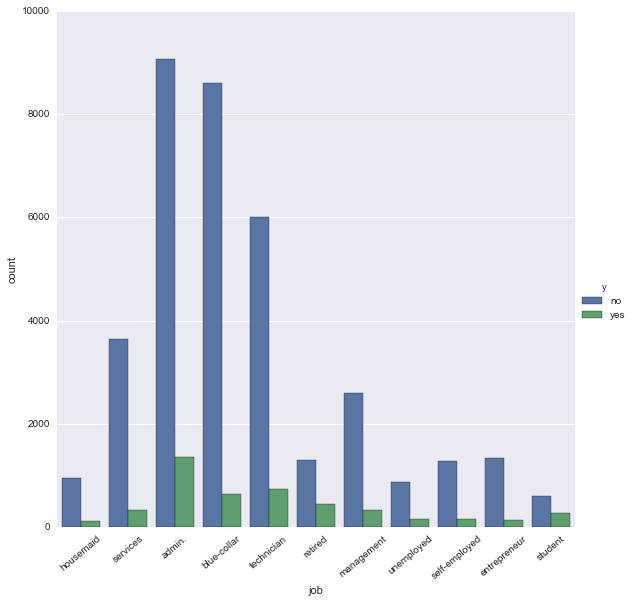

In [10]:
#histogram by job type
jobs = ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired',
 'management', 'unemployed', 'self-employed', 'entrepreneur',
 'student']
g = sns.factorplot("job", hue="y", data=data[data.job!='unknown'], kind='count', size=8, x_order=jobs)
g.set_xticklabels(rotation=40)

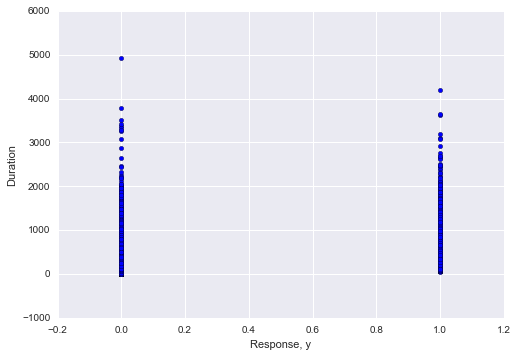

In [11]:
plt.scatter(data['y'].map({'yes':1,'no':0}),data[['duration']])
plt.ylabel("Duration")
plt.xlabel("Response, y")
plt.show()

# Preprocess and split

In [12]:
#One hot encoding for categorical data
vec = DictVectorizer()
dataproc = data
dataproc = dataproc[['age' ,'job' ,'marital', 'education', 'default' ,'housing', 'loan', 'contact',
 'month', 'day_of_week' , 'campaign', 'pdays', 'previous', 'poutcome',
 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx' ,'euribor3m' ,'nr.employed']]
d=dataproc.T.to_dict().values()
dataproc=vec.fit_transform(d).toarray()
yaxe=data['y'].map({'yes': 1, 'no': 0})

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataproc, yaxe, test_size=0.30, random_state=1)

# Logistic Regression

In [14]:
logreg = linear_model.LogisticRegression(C=1e5)

logreg.fit(X_train, y_train)
LRprob = logreg.predict_proba(X_test)
LRpred = logreg.predict(X_test)
print metrics.accuracy_score(y_test, LRpred)
print metrics.roc_auc_score(y_test, LRpred)
LRprob[1,:]
print metrics.confusion_matrix(y_test, LRpred)
print metrics.classification_report(y_test, LRpred)
print cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv=10).mean()


0.896981467994
0.585595864994
[[10827   117]
 [ 1156   257]]
             precision    recall  f1-score   support

          0       0.90      0.99      0.94     10944
          1       0.69      0.18      0.29      1413

avg / total       0.88      0.90      0.87     12357

0.901737628958


# Decision Tree

In [15]:
dtclf = DecisionTreeClassifier(random_state=1)
dtclf.fit(X_train, y_train)

scores_list = []
DTpred = dtclf.predict(X_test)
DTprob = dtclf.predict_proba(X_test)
print metrics.accuracy_score(y_test, DTpred)
print metrics.roc_auc_score(y_test, DTpred)
print dtclf.feature_importances_
print metrics.confusion_matrix(y_test, DTpred)
print metrics.classification_report(y_test, DTpred)
print cross_val_score(dtclf, X_train, y_train, scoring='accuracy', cv=10).mean()


0.840818969005
0.619837353801
[ 0.17072339  0.07635564  0.01824951  0.00897634  0.00240848  0.00571083
  0.01446518  0.01520089  0.01348527  0.01302089  0.01391909  0.00612924
  0.00850158  0.          0.00983911  0.00561006  0.01084649  0.01411821
  0.0003136   0.01147986  0.01859084  0.00606138  0.00251573  0.08729909
  0.02390873  0.00182289  0.02300002  0.02065117  0.01383988  0.00411993
  0.00463756  0.00865596  0.0054462   0.00602515  0.00865454  0.00271329
  0.01600436  0.00498207  0.00318975  0.01182518  0.00183735  0.01586867
  0.0110717   0.01542423  0.01864031  0.00050231  0.00299341  0.00174242
  0.          0.00360281  0.0006576   0.00096679  0.00134392  0.00106305
  0.00565854  0.00202472  0.15706216  0.04200044  0.00916218  0.00466322
  0.00089874  0.00951807]
[[9919 1025]
 [ 942  471]]
             precision    recall  f1-score   support

          0       0.91      0.91      0.91     10944
          1       0.31      0.33      0.32      1413

avg / total       0.84    

In [16]:
df = pd.DataFrame({"Features": vec.get_feature_names(),"Importance": dtclf.feature_importances_})
df=df.sort_values(by='Importance', ascending = True)
df#.reset_index(inplace=True)


,Features,Importance
48,month=dec,0.000000
13,default=yes,0.000000
18,education=illiterate,0.000314
45,marital=unknown,0.000502
50,month=jun,0.000658
60,poutcome=success,0.000899
51,month=mar,0.000967
53,month=nov,0.001063
52,month=may,0.001344
47,month=aug,0.001742


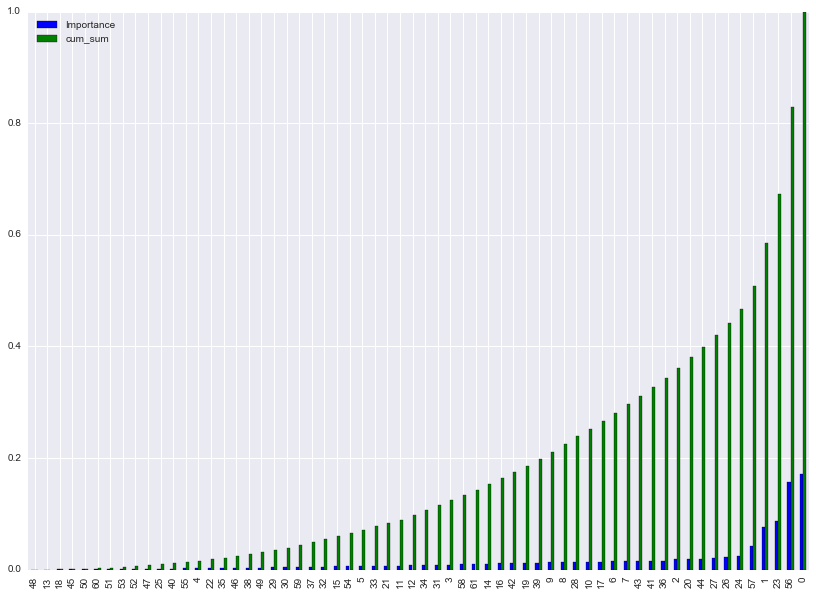

In [17]:
df['cum_sum'] = df.Importance.cumsum()
df.plot(kind='bar',align='center', figsize=(14,10))

# SVM

In [24]:
from time import time
clf_svm = sklearn.svm.SVC(class_weight='auto',probability=True)

t0 = time()
clf_svm.fit(X_train, y_train)
print "training time:", round(time()-t0, 3), "s"

t0 = time()
pred_svm = clf_svm.predict(X_test)
print "prediction time:", round(time()-t0, 3), "s"


print clf_svm.score(X_test,y_test)
print sklearn.metrics.roc_auc_score(y_test, pred_svm)
print sklearn.metrics.confusion_matrix(y_test, pred_svm)
print sklearn.metrics.classification_report(y_test, pred_svm)

training time: 721.474 s
prediction time: 19.64 s
0.847940438618
0.750823823425
[[9595 1349]
 [ 530  883]]
             precision    recall  f1-score   support

          0       0.95      0.88      0.91     10944
          1       0.40      0.62      0.48      1413

avg / total       0.88      0.85      0.86     12357



C:\Users\mahesh\Anaconda2\lib\site-packages\sklearn\utils\class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


# Naive Bayes 

In [23]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB()
nbclf.fit(X_train, y_train)

nb_pred = nbclf.predict(X_test)
print metrics.accuracy_score(y_test, nb_pred)
print metrics.roc_auc_score(y_test, nb_pred)
print metrics.confusion_matrix(y_test, nb_pred)
print metrics.classification_report(y_test, nb_pred)
print cross_val_score(nbclf, X_train, y_train, scoring='accuracy', cv=10).mean()


0.853848021364
0.684204415298
[[9895 1049]
 [ 757  656]]
             precision    recall  f1-score   support

          0       0.93      0.90      0.92     10944
          1       0.38      0.46      0.42      1413

avg / total       0.87      0.85      0.86     12357

0.856403168863


In [25]:
svm_prob= clf_svm.predict_proba(X_test)
nb_prob=nbclf.predict_proba(X_test)

# KNN

In [20]:
knnclf = KNeighborsClassifier()
knnclf.fit(X_train, y_train)

# predict class labels for the test set
knn_pred = knnclf.predict(X_test)
# generate class probabilities
knn_prob = knnclf.predict_proba(X_test)

# generate evaluation metrics
print metrics.accuracy_score(y_test, knn_pred)
print metrics.roc_auc_score(y_test, knn_pred)

# evaluate the model using 10-fold cross-validation
scores = cross_val_score(knnclf, X_train, y_train, scoring='accuracy', cv=10)
print "CV scores :" , scores.mean()
print metrics.confusion_matrix(y_test, knn_pred)
print metrics.classification_report(y_test, knn_pred)


0.889455369426
0.626956107759
CV scores : 0.890325988281
[[10586   358]
 [ 1008   405]]
             precision    recall  f1-score   support

          0       0.91      0.97      0.94     10944
          1       0.53      0.29      0.37      1413

avg / total       0.87      0.89      0.87     12357



# Random Forest

In [21]:
rfclf = RandomForestClassifier(n_estimators=100,max_features='auto',min_samples_split=1)
rfclf.fit(X_train, y_train)
# predict class labels for the test set
rf_pred = rfclf.predict(X_test)
# generate class probabilities
rf_prob = rfclf.predict_proba(X_test)
# generate evaluation metrics
print metrics.accuracy_score(y_test, rf_pred)
print metrics.roc_auc_score(y_test, rf_pred)
print metrics.confusion_matrix(y_test, rf_pred)
print metrics.classification_report(y_test, rf_pred)

# evaluate the model using 10-fold cross-validation
scores = cross_val_score(rfclf, X_train, y_train, scoring='accuracy', cv=10)
print scores.mean()

0.891640365785
0.624183451596
[[10626   318]
 [ 1021   392]]
             precision    recall  f1-score   support

          0       0.91      0.97      0.94     10944
          1       0.55      0.28      0.37      1413

avg / total       0.87      0.89      0.88     12357

0.894280527748


# Adaboost

In [22]:

from sklearn.ensemble import AdaBoostClassifier
adaclf = AdaBoostClassifier(n_estimators=10)

adaclf = adaclf.fit(X_train,y_train)

adapred = adaclf.predict(X_test)
adaprob = adaclf.predict_proba(X_test)

print metrics.accuracy_score(y_test, adapred)
print metrics.roc_auc_score(y_test, adapred)
print metrics.confusion_matrix(y_test, adapred)
print metrics.classification_report(y_test, adapred)
adascores = cross_val_score(adaclf, X_train, y_train)
print adascores.mean()


0.896819616412
0.590743379149
[[10808   136]
 [ 1139   274]]
             precision    recall  f1-score   support

          0       0.90      0.99      0.94     10944
          1       0.67      0.19      0.30      1413

avg / total       0.88      0.90      0.87     12357

0.899621916913


# Evaluating Performance of Models

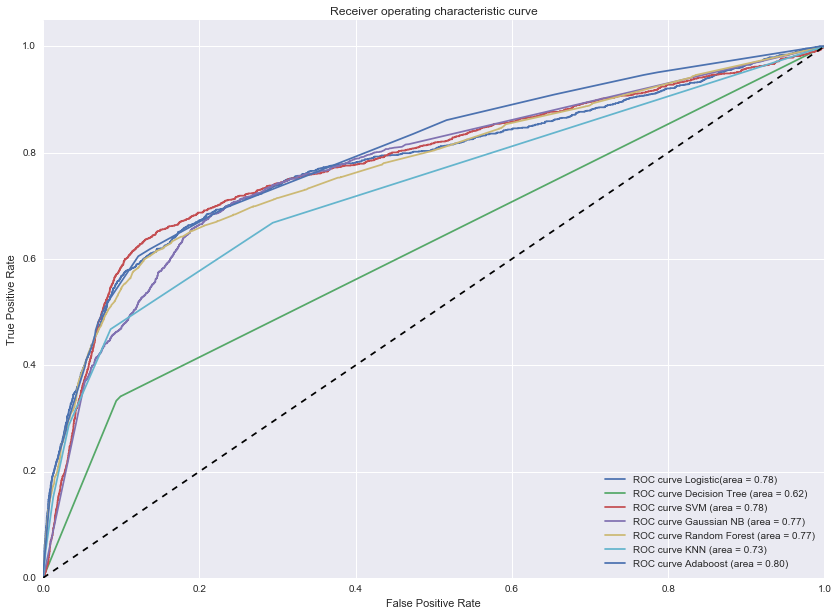

In [26]:
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr[0], tpr[0], _ = roc_curve(y_test, LRprob[:,1])
roc_auc[0] = auc(fpr[0], tpr[0])

fpr[1], tpr[1], _ = roc_curve(y_test, DTprob[:,1])
roc_auc[1] = auc(fpr[1], tpr[1])

fpr[2], tpr[2], _ = roc_curve(y_test, svm_prob[:,1])
roc_auc[2] = auc(fpr[2], tpr[2])

fpr[3], tpr[3], _ = roc_curve(y_test, nb_prob[:,1])
roc_auc[3] = auc(fpr[3], tpr[3])

fpr[4], tpr[4], _ = roc_curve(y_test, rf_prob[:,1])
roc_auc[4] = auc(fpr[4], tpr[4])

fpr[5], tpr[5], _ = roc_curve(y_test, knn_prob[:,1])
roc_auc[5] = auc(fpr[5], tpr[5])

fpr[6], tpr[6], _ = roc_curve(y_test, adaprob[:,1])
roc_auc[6] = auc(fpr[6], tpr[6])


# Plot of a ROC curve 
plt.figure(figsize=(14,10))
plt.plot(fpr[0], tpr[0], label='ROC curve Logistic(area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], label='ROC curve Decision Tree (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], label='ROC curve SVM (area = %0.2f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3], label='ROC curve Gaussian NB (area = %0.2f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4], label='ROC curve Random Forest (area = %0.2f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5], label='ROC curve KNN (area = %0.2f)' % roc_auc[5])
plt.plot(fpr[6], tpr[6], label='ROC curve Adaboost (area = %0.2f)' % roc_auc[6])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Logistic regression example for probability of a customer accepting a term deposit (customer not in dataset)

In [27]:

# age-42,job=2,marital=1,education=6,default=0,housing=0,loan=0,contact=1,month=5,
# campaign=2,pdays=0,previous=0,poutcome=2,cons_price=93.994,cons_conf=-36.4,emp_var_rate=1.4,euribor3m=4.857,nr_emp=5191

logreg.predict_proba(np.array([
42,2,-36.4,93.994,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.4,4.857,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,
0,0,5191,0,0,0,1,0]))

C:\Users\mahesh\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.7393403,  0.2606597]])

26% chances of above customer going for a term deposit.

In [89]:
def lift(prob, y_t, model):
    final_model = [i for i in prob[:,1]] #take term deposit probability
    prob_test_model = pd.DataFrame({ 'prob' : pd.Series(final_model),
                           'result' : pd.Series(y_t.ravel())
                        })
    lift_model = pd.DataFrame(columns=['first n%', 'sales_'+model, 'total_conversion_rate'])
    lift_model.loc[0] = [0,0,np.mean(prob_test_model['result'])]
    for p in np.arange(1,11,1):
        per = np.percentile(prob_test_model['prob'], 100-p*10)  
        if (per==1):
            lift_model.loc[p] =  [p*10, np.sum(prob_test_model['result'][prob_test_model.prob >= per]), np.mean(prob_test_model['result'])]
        else:
            lift_model.loc[p] =  [p*10, np.sum(prob_test_model['result'][prob_test_model.prob > per]), np.mean(prob_test_model['result'])]
            #print prob_test_model['result'][prob_test_model.prob >= per]
            

    #lift_model['lift_'+model] = lift_model['conversion_rate_'+model]/lift_model['total_conversion_rate_'+model]
    lift_model['sales_proportion_'+model] = lift_model['sales_'+model]/np.sum(prob_test_model['result'])*100
    return lift_model

In [90]:
lift_LR = lift(LRprob, y_test, 'LR')
lift_DT = lift(DTprob, y_test, 'DT')
lift_NB = lift(nb_prob, y_test, 'NB')
lift_SVM = lift(svm_prob, y_test, 'SVM')
lift_KNN = lift(knn_prob, y_test, 'KNN')
lift_RF = lift(rf_prob, y_test, 'RF')
lift_Ada = lift(adaprob, y_test, 'Ada')

lift_comp = lift_LR[['first n%', 'total_conversion_rate', 'sales_proportion_LR']]
lift_comp['sales_proportion_DT'] = lift_DT['sales_proportion_DT']
lift_comp['sales_proportion_NB'] = lift_NB['sales_proportion_NB']
lift_comp['sales_proportion_SVM'] = lift_SVM['sales_proportion_SVM']
lift_comp['sales_proportion_KNN'] = lift_KNN['sales_proportion_KNN']
lift_comp['sales_proportion_RF'] = lift_RF['sales_proportion_RF']
lift_comp['sales_proportion_Ada'] = lift_Ada['sales_proportion_Ada']

lift_comp

,first n%,total_conversion_rate,sales_proportion_LR,sales_proportion_DT,sales_proportion_NB,sales_proportion_SVM,sales_proportion_KNN,sales_proportion_RF,sales_proportion_Ada
0,0,0.114348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,10,0.114348,42.179759,33.262562,39.561217,40.905874,28.662420,42.250531,41.047417
2,20,0.114348,61.924982,34.182590,57.820241,64.543524,46.779901,61.995754,61.854211
3,30,0.114348,70.771408,34.182590,70.771408,71.620665,46.779901,68.365180,69.568294
4,40,0.114348,76.999292,34.182590,76.362350,76.079264,66.808209,73.319179,69.568294
5,50,0.114348,79.900920,34.182590,81.104034,80.396320,66.808209,78.131635,69.568294
6,60,0.114348,83.439490,34.182590,85.421090,84.854919,66.808209,80.679406,86.128804
7,70,0.114348,87.119604,34.182590,89.738146,88.322718,66.808209,85.350318,90.941260
8,80,0.114348,91.295117,34.182590,93.418259,91.790517,66.808209,89.242746,94.621373
9,90,0.114348,96.036801,34.182590,97.027601,95.399858,66.808209,94.621373,95.116773


Above table shows total number of true conversions in the first n% of highest probabilites in predict_proba
               
     for example sales_proportion_RF is 42.25 for first 10%. 
If predictors are used to choose clients according to rank of probabilities, there will be a lift in converstion rate. In the above example first 10% of the leads would lead to 42.25% of the total sales, which is a very useful information for the Bank.

SVM, Logistic Regression, Adaboost, Gaussian Naive Bayes and Random Forest all have better performance when compared to KNN and Decision Trees.


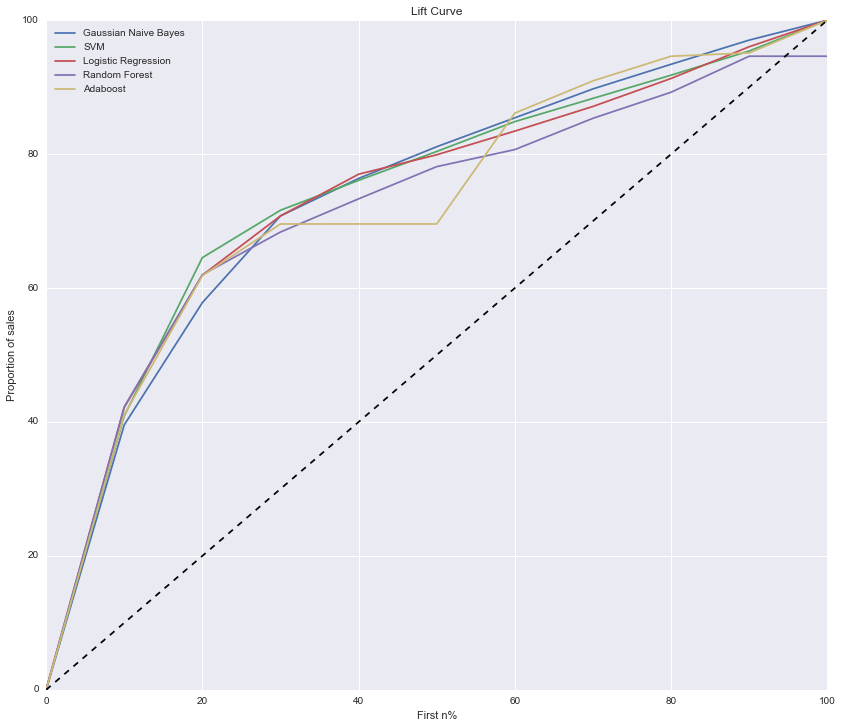

In [94]:
plt.figure(figsize=(14,12))
plt.plot(lift_comp['first n%'], lift_comp['sales_proportion_NB'], label='Gaussian Naive Bayes')
plt.plot(lift_comp['first n%'], lift_comp['sales_proportion_SVM'], label='SVM')
#plt.plot(lift_comp['first n%'], lift_comp['sales_proportion_DT'], label='Decision Tree')
plt.plot(lift_comp['first n%'], lift_comp['sales_proportion_LR'], label='Logistic Regression')
#plt.plot(lift_comp['first n%'], lift_comp['sales_proportion_KNN'], label='KNN')
plt.plot(lift_comp['first n%'], lift_comp['sales_proportion_RF'], label='Random Forest')
plt.plot(lift_comp['first n%'], lift_comp['sales_proportion_Ada'], label='Adaboost')
plt.plot(np.arange(0,101,10), np.arange(0,101,10), 'k--')
plt.xlabel("First n%")
plt.ylabel('Proportion of sales')
plt.title('Lift Curve')
plt.legend(loc="best")
